In [1]:
import music21 as m
import IPython
from IPython.display import Image, Audio

In [2]:
import numpy as np
from typing import List, Set

# Notes

In [3]:
f=m.note.Note('C1')
f.duration.type='half'
f.show()
# note.Note('C3').show()


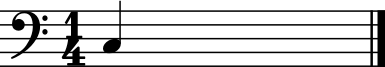

In [4]:
m.note.Note('C3').show()

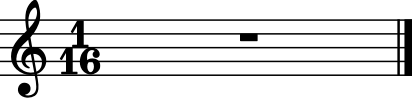

In [5]:
r = m.note.Rest()
r.duration = m.duration.Duration(0.25)
r.show()

In [6]:
i=m.instrument.Guitar()
stream1 = m.stream.Stream(instrument=i)
note1=m.note.Note('C3#')
note1.duration=m.duration.Duration(0.5)
note2=m.note.Note('C5')
note2.duration=m.duration.Duration(1.25)
note3=m.note.Rest()
note3.duration=m.duration.Duration(1.5)
note4=m.note.Note('C4')
note4.duration=m.duration.Duration(0.75)

stream1.append(note1)
stream1.append(note2)
stream1.append(note3)
stream1.append(note4)

stream1.show()

In [7]:
stream1.show('midi')

In [8]:
{x:list(np.arange(1,13)) for x in np.arange(1,7)}

{1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 2: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 3: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 4: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 5: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 6: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

In [9]:
note_dict={
    "e":["F4","F4#","G4","G4#","A4","A4#","B4","C5","C5#","D5","D5#","E5"],
    "B":["C4","C4#","D4","D4#","E4","F4","F4#","G4","G4#","A4","A4#","B4"],
    "G":["G3#","A3","A3#","B3","C4","C4#","D4","D4#","E4","F4","F4#","G4"],
    "D":["D3#","E3","F3","F3#","G3","G3#","A3","A3#","B3","C4","C4#","D4"],
    "A":["A2#","B2","C3","C3#","D3","D3#","E3","F3","F3#","G3","G3#","A3"],
    "E":["F2","F2#","G2","G2#","A2","A2#","B2","C3","C3#","D3","D3#","E3"],
}

In [10]:
type(stream1)

music21.stream.base.Stream

In [11]:
list(note_dict.keys())[4]

'A'

In [12]:
note_dict['A'][5]

'D3#'

In [13]:
"1.3".split(".")

['1', '3']

In [14]:
_get_note("5.4")

NameError: name '_get_note' is not defined

# Creating streams

In [20]:
def _get_note(n):
    string,fret=n.split(".")
    string=list(note_dict.keys())[int(string)-1]
    if int(fret) > 0:
        return note_dict[string][int(fret)-1]
    else:
        return string

def compose_score(notes:List[Set]) -> m.stream.base.Stream:
    """
    1. Get notes
    2. Add notes and duration to score
    
    Expected format: notes = List[Set("string.fret",duration)]
    Eg. notes_for_C=[(),(),(),()]

    """
    i=m.instrument.Guitar()
    streamx = m.stream.Stream(instrument=i)

    for note_and_duration in notes:
        notex,durationx=note_and_duration
        notex_=_get_note(notex)
        notex=m.note.Note(notex_)
        notex.duration=m.duration.Duration(durationx)
        streamx.append(notex)
    return streamx

In [21]:
note_list=[("5.3",0.5),("5.5",0.5),("4.2",0.5),("4.5",0.5),("3.2",0.5),("3.5",0.5),("2.3",0.5),("2.5",0.5),("1.3",0.5),("1.5",0.5),("1.8",2)]

In [ ]:
stream_C=compose_score(note_list)

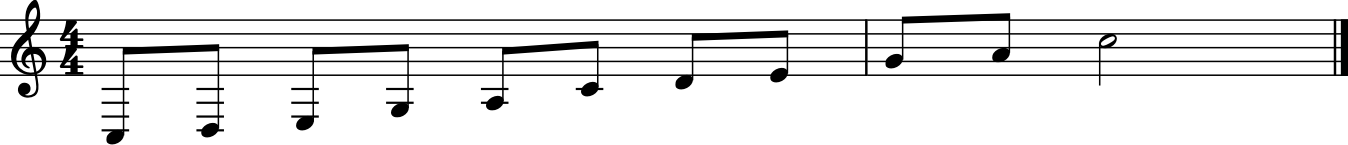

In [ ]:
stream_C.show()

In [ ]:
stream_C.show('midi')

In [25]:
note_list = [("5.0",0.25),("5.2",0.25),("5.5",0.25),("4.4",0.25),("3.2",0.5),("4.4",0.5),("5.5",0.25),("5.7",0.25),("4.4",0.5),("4.7",0.5),("4.4",0.5),\
             ("6.3",0.5),("5.5",0.5),("4.7",0.5),("6.6",0.5),("5.8",0.5),("4.10",0.5),("6.8",0.5),("5.10",0.5),("4.12",4)]

In [26]:
twisted_hands=compose_score(note_list)

In [29]:
twisted_hands.show("midi")